<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

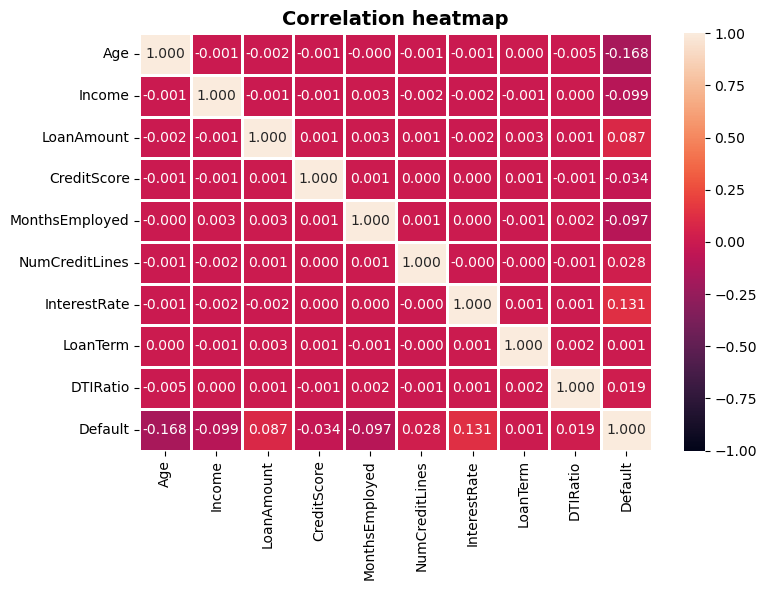

count    255347.00
mean      82499.30
std       38963.01
min       15000.00
25%       48825.50
50%       82466.00
75%      116219.00
max      149999.00
Name: Income, dtype: float64

count    255347.00
mean        574.26
std         158.90
min         300.00
25%         437.00
50%         574.00
75%         712.00
max         849.00
Name: CreditScore, dtype: float64
IncomeLevel
Very High Income        94565
Middle Income           66422
Below Average Income    66096
High Income             28261
Low Income                  3
Name: count, dtype: int64

CreditScoreLevel
Fair         93029
Average      92888
Very Good    45962
Excellent    23468
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmou

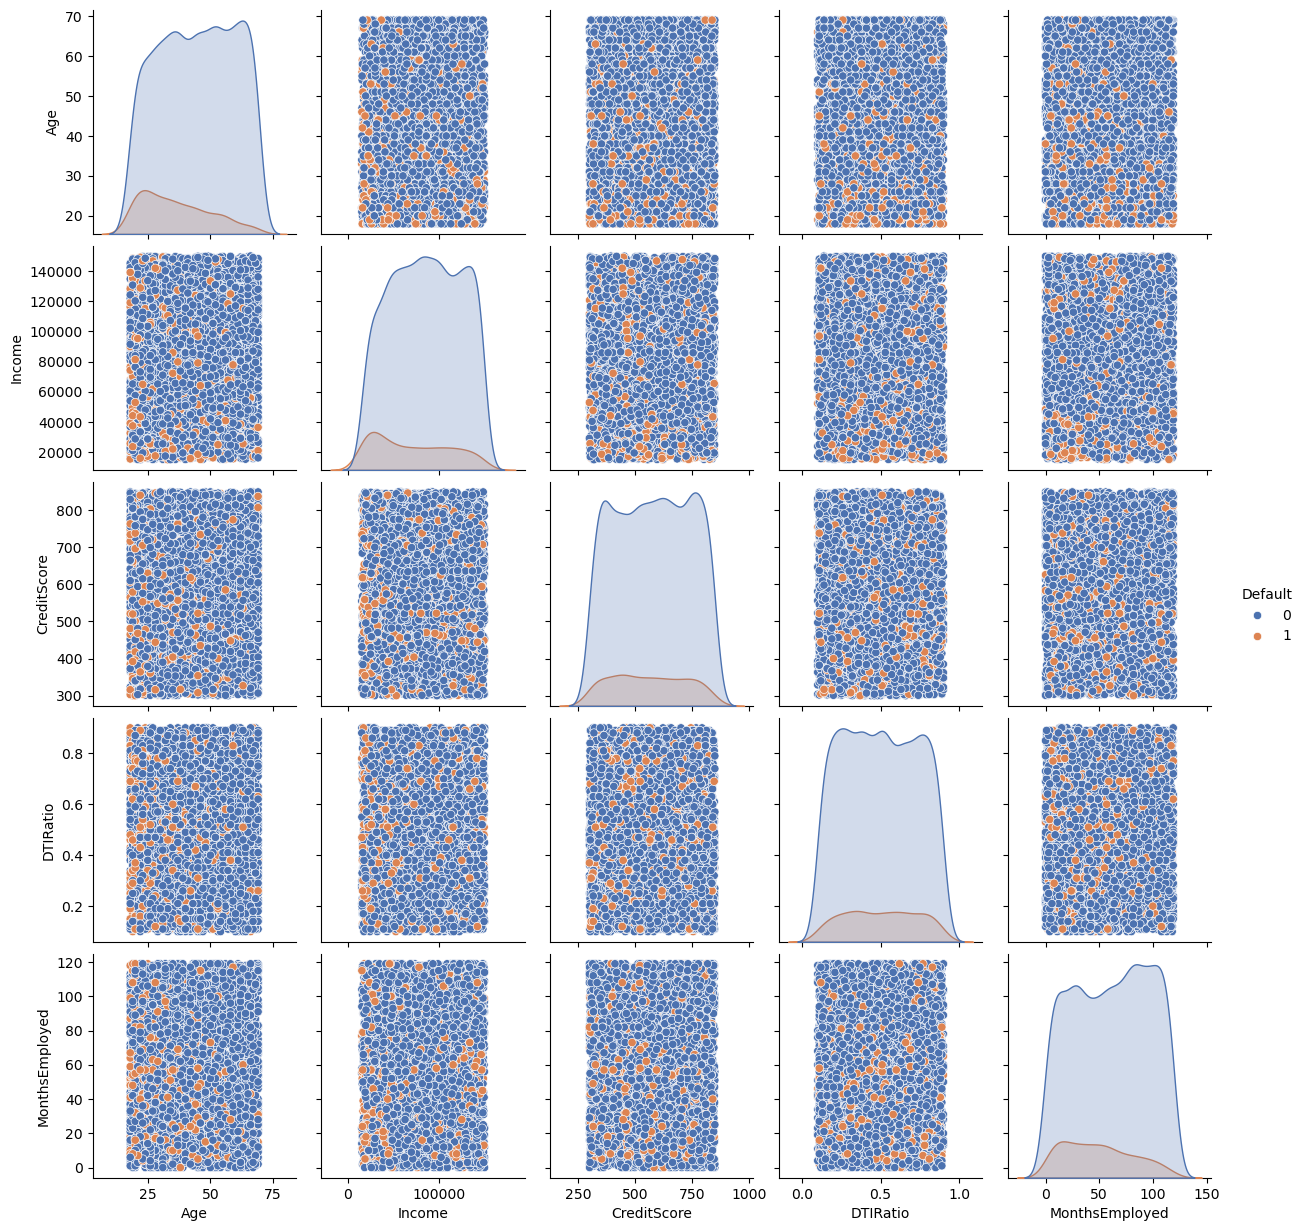

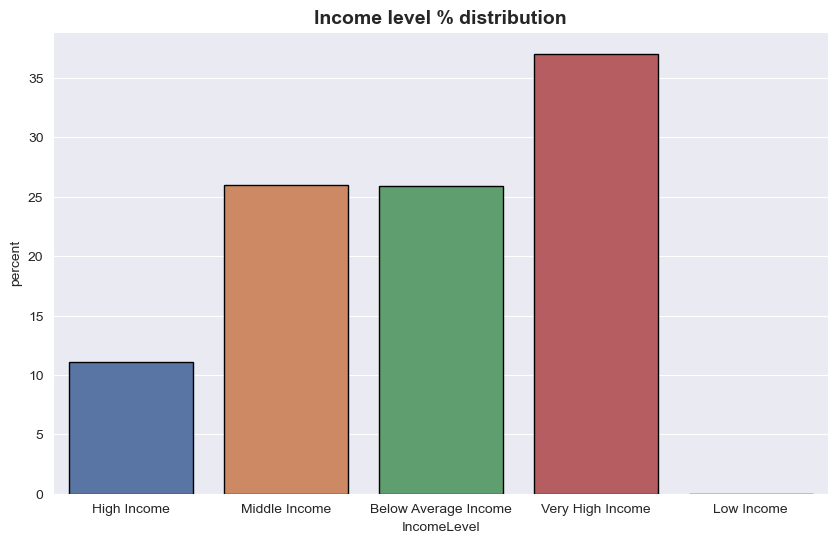

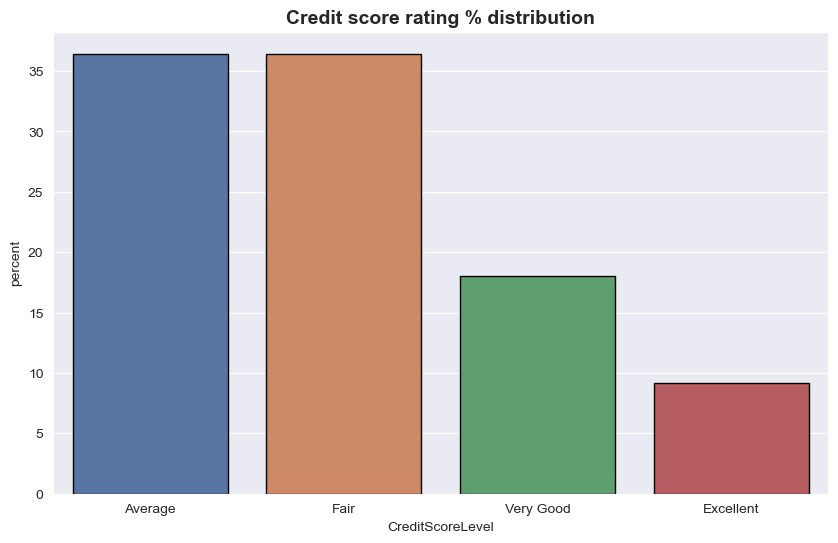

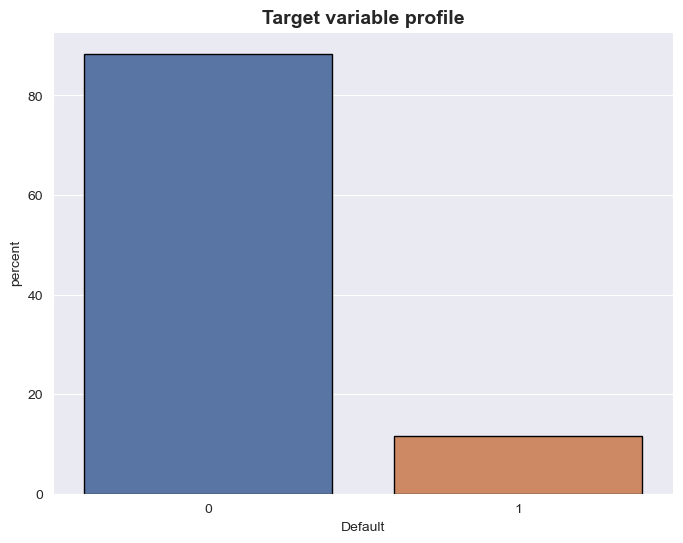

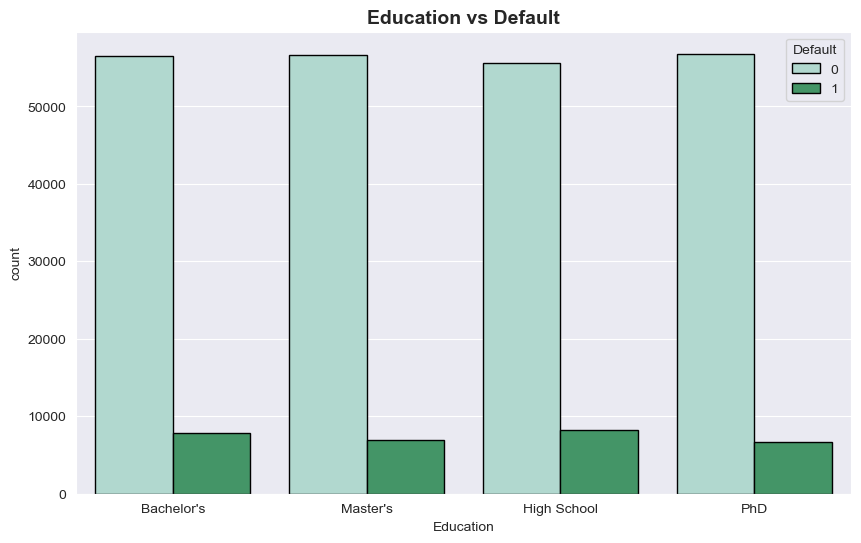

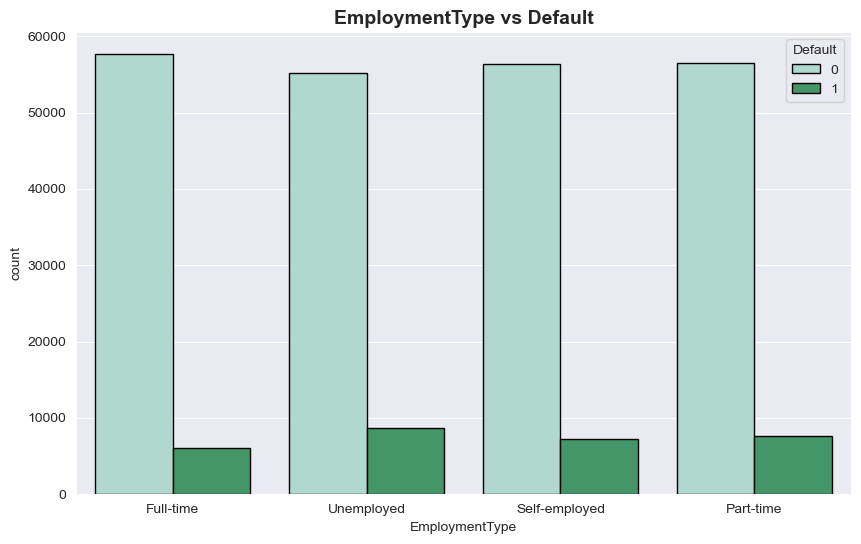

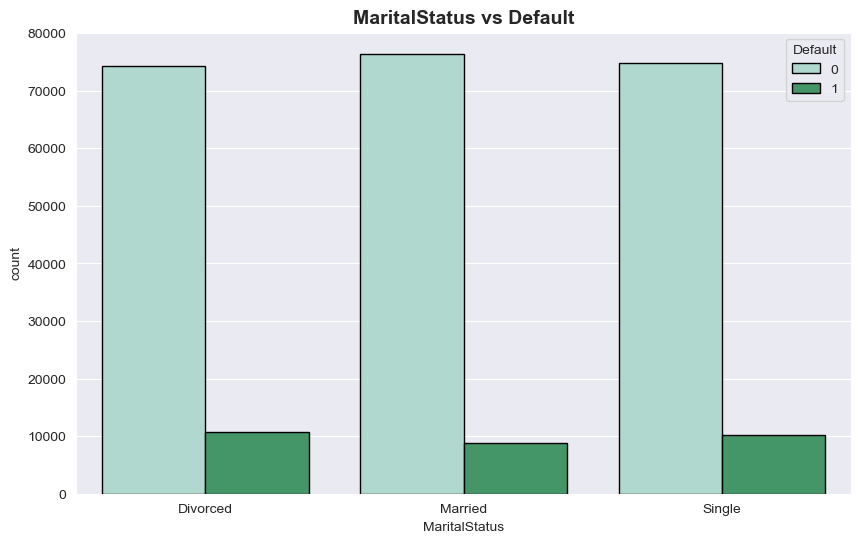

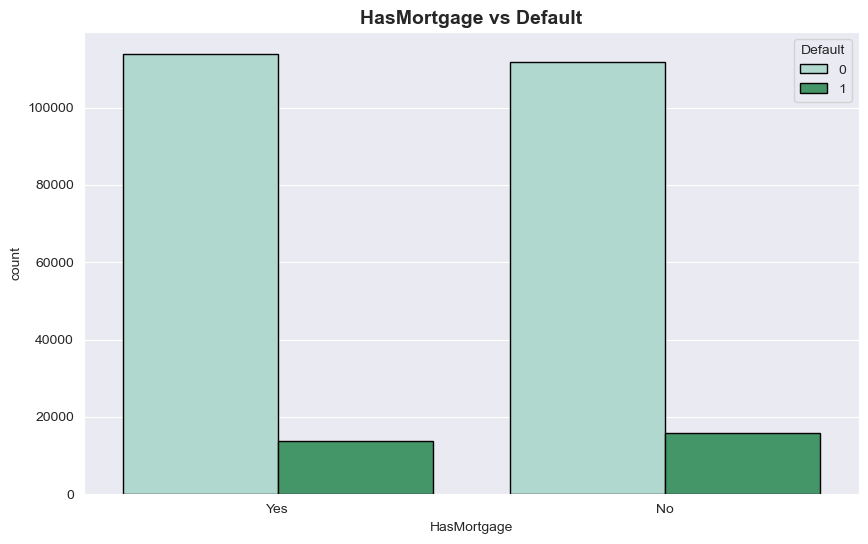

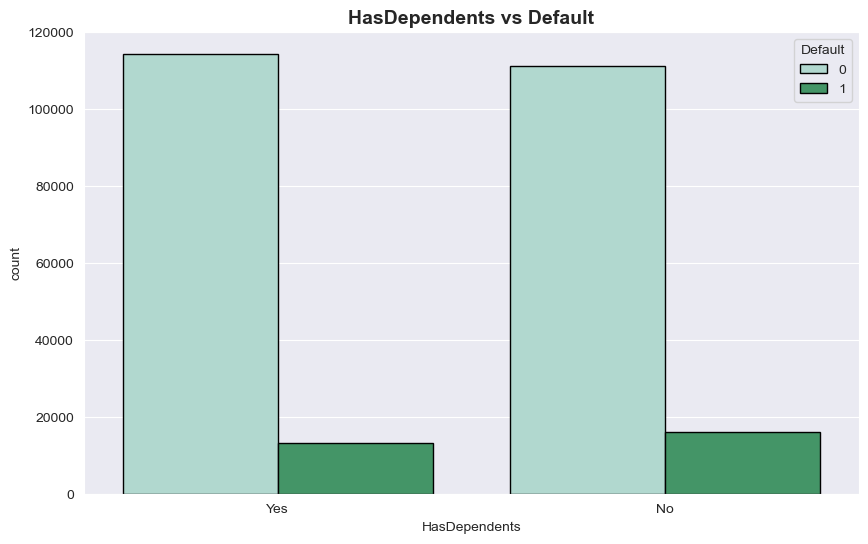

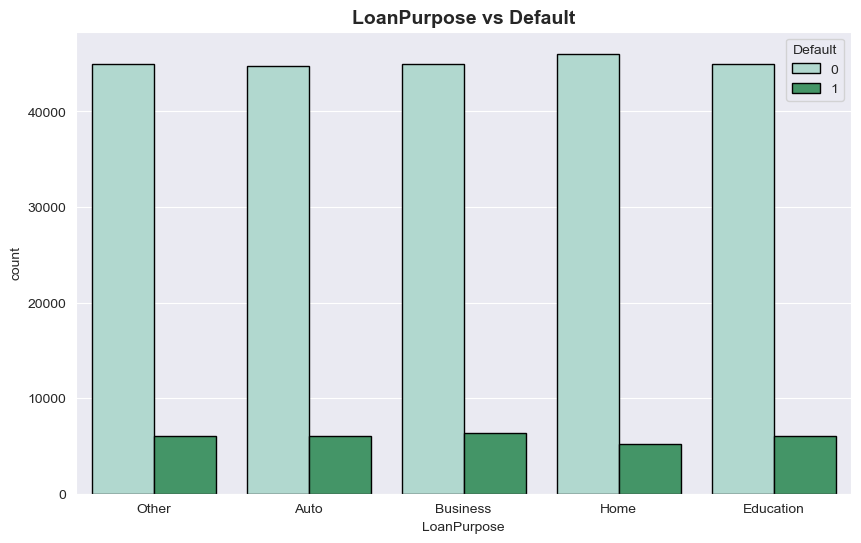

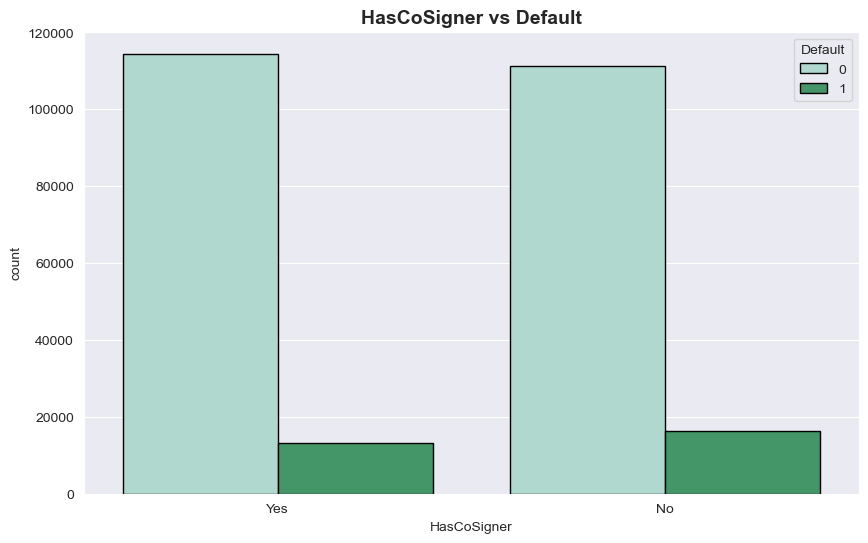

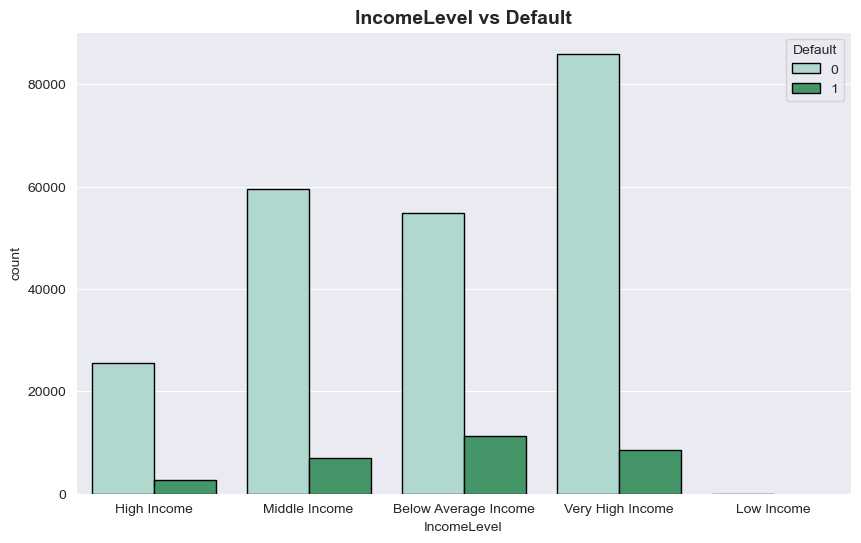

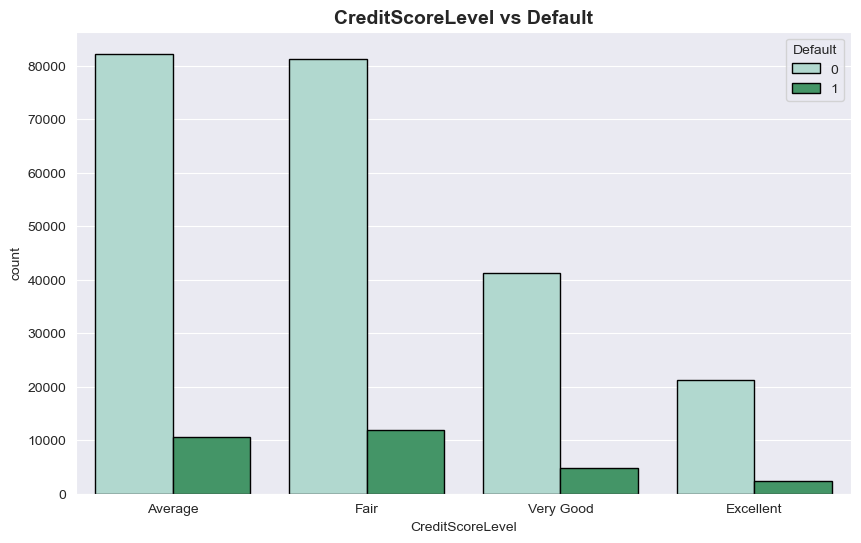

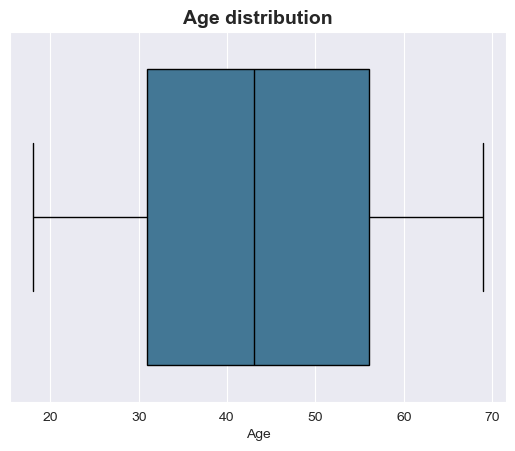

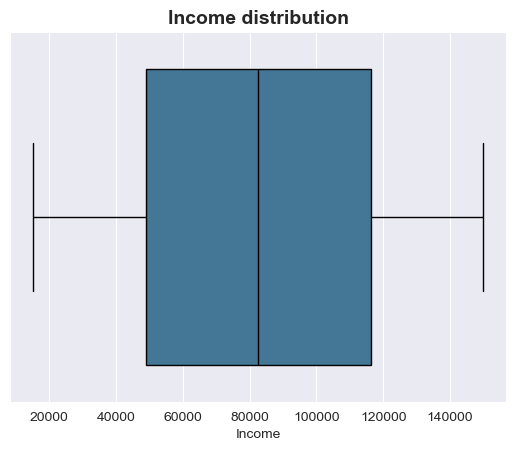

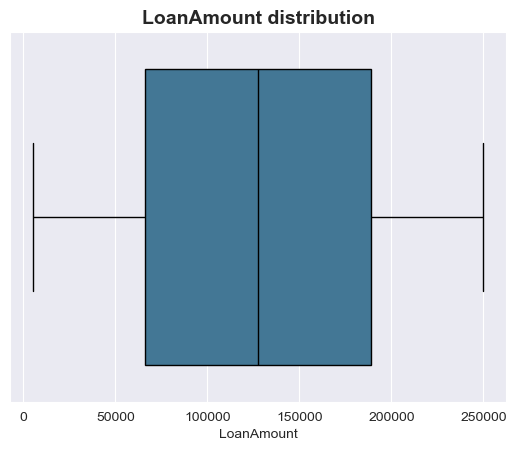

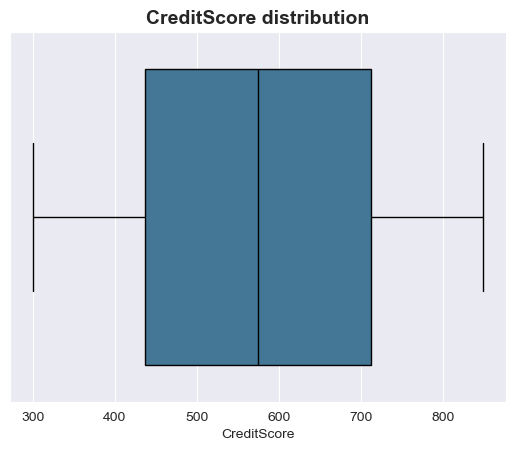

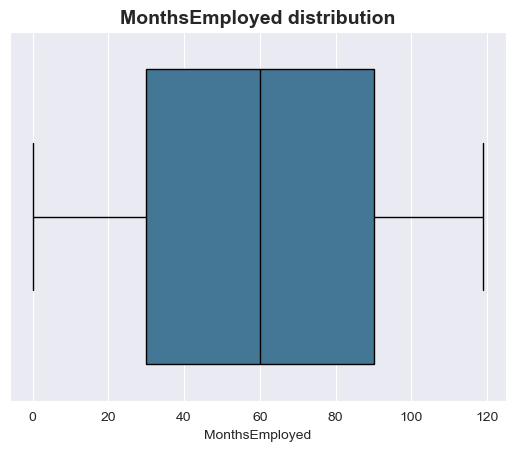

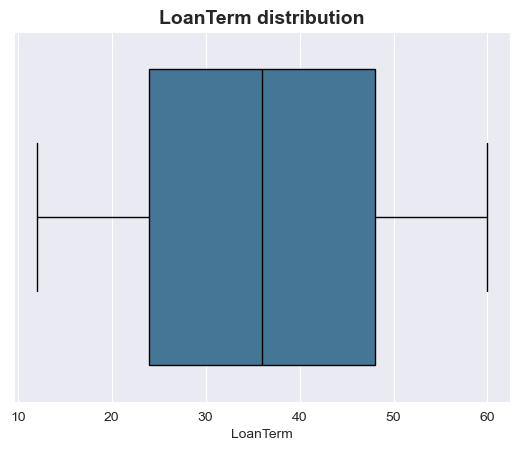

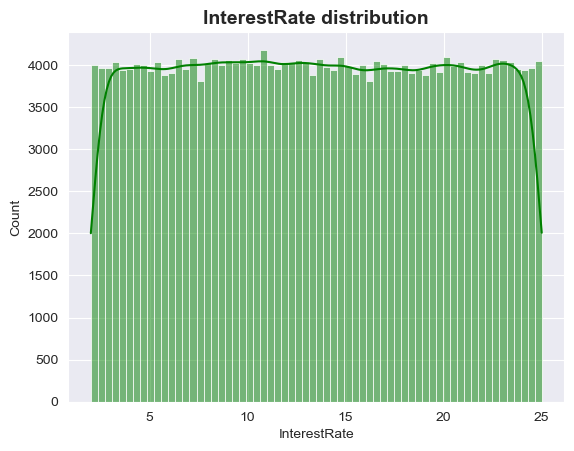

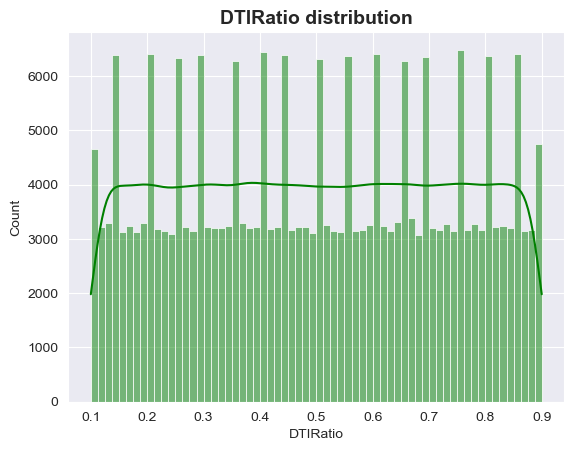

In [1]:
# Load EDA notebook
%run Loan_default_EDA.ipynb

## Loan preprocessing

In [1]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [3]:
# Check original dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmount        255347 non-null  int64  
 3   CreditScore       255347 non-null  int64  
 4   MonthsEmployed    255347 non-null  int64  
 5   NumCreditLines    255347 non-null  int64  
 6   InterestRate      255347 non-null  float64
 7   LoanTerm          255347 non-null  int64  
 8   DTIRatio          255347 non-null  float64
 9   Education         255347 non-null  object 
 10  EmploymentType    255347 non-null  object 
 11  MaritalStatus     255347 non-null  object 
 12  HasMortgage       255347 non-null  object 
 13  HasDependents     255347 non-null  object 
 14  LoanPurpose       255347 non-null  object 
 15  HasCoSigner       255347 non-null  object 
 16  Default     

In [4]:
# Copy dataframe for model preprocessing. Drop Income level and credit score level
df_prep = df.copy(deep = True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmount        255347 non-null  int64  
 3   CreditScore       255347 non-null  int64  
 4   MonthsEmployed    255347 non-null  int64  
 5   NumCreditLines    255347 non-null  int64  
 6   InterestRate      255347 non-null  float64
 7   LoanTerm          255347 non-null  int64  
 8   DTIRatio          255347 non-null  float64
 9   Education         255347 non-null  object 
 10  EmploymentType    255347 non-null  object 
 11  MaritalStatus     255347 non-null  object 
 12  HasMortgage       255347 non-null  object 
 13  HasDependents     255347 non-null  object 
 14  LoanPurpose       255347 non-null  object 
 15  HasCoSigner       255347 non-null  object 
 16  Default     

## Feature encoding

In [5]:
# Transform Categorigal features using encoding
# Find features that have 'Yes' or 'No'
binary_values = {'Yes', 'No'}

yes_no_columns = [
    col for col in df_prep.columns
    if set(df[col].unique()).issubset(binary_values)
]

print("Columns with only 'Yes' or 'No':", yes_no_columns)

Columns with only 'Yes' or 'No': ['HasMortgage', 'HasDependents', 'HasCoSigner']


In [6]:
# Map above columns to 0 and 1
df_prep[yes_no_columns] = df_prep[yes_no_columns].replace({'Yes': 1, 'No': 0})
df_prep[yes_no_columns].head()

,HasMortgage,HasDependents,HasCoSigner
LoanID,,,
I38PQUQS96,1,1,1
HPSK72WA7R,0,0,1
C1OZ6DPJ8Y,1,1,0
V2KKSFM3UN,0,0,0
EY08JDHTZP,0,1,0


In [7]:
# Check dataframe for encoding labels - No value order
object_columns = df_prep.select_dtypes('object').drop(['IncomeLevel', 'CreditScoreLevel'], axis = 1)
object_columns.head()

,Education,EmploymentType,MaritalStatus,LoanPurpose
LoanID,,,,
I38PQUQS96,Bachelor's,Full-time,Divorced,Other
HPSK72WA7R,Master's,Full-time,Married,Other
C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Auto
V2KKSFM3UN,High School,Full-time,Married,Business
EY08JDHTZP,Bachelor's,Unemployed,Divorced,Auto


In [8]:
# Check dataframe for encoding labels - Value order
value_columns = df_prep[['IncomeLevel', 'CreditScoreLevel']]
value_columns.head()

,IncomeLevel,CreditScoreLevel
LoanID,,
I38PQUQS96,High Income,Average
HPSK72WA7R,Middle Income,Fair
C1OZ6DPJ8Y,Middle Income,Fair
V2KKSFM3UN,Below Average Income,Very Good
EY08JDHTZP,Below Average Income,Average


In [12]:
# Encode the object items that have no value order
ohe = OneHotEncoder()
ohe_fit = ohe.fit(object_columns)
ohe_arr = ohe.transform(object_columns).toarray()
ohe_labels = ohe.get_feature_names_out()

# Encode the object items that have value order
orenc = OrdinalEncoder()
orenc_fit = orenc.fit(value_columns)
orenc_arr = orenc.transform(value_columns)
orenc_labels = orenc.get_feature_names_out()

# Convert encoded arrays to Dataframe
ohe_df = pd.DataFrame(ohe_arr, columns = ohe_labels, index = df_prep.index)
orenc_df = pd.DataFrame(orenc_arr, columns = orenc_labels, index = df_prep.index)

# Drop original object columns
enc_df = df_prep.drop(columns = object_columns + value_columns)

# Concatenate new columns with dataframe
df_2 = pd.concat(objs = [enc_df, ohe_df, orenc_df], axis = 1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  int64  
 10  HasDependents                 255347 non-null  int64  
 11  HasCoSigner                   255347 non-null  int64  
 12  Default                       255347